In [1]:
import pandas as pd
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('salaries.csv')
df

Saving salaries.csv to salaries.csv


,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [3]:
x=df.drop('salary_more_then_100k',axis='columns')
y=df['salary_more_then_100k']

In [4]:
x.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [5]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le_company= LabelEncoder()
le_job= LabelEncoder()
le_degree= LabelEncoder()

In [8]:
x['company']=le_company.fit_transform(x['company'])
x['job']=le_job.fit_transform(x['job'])
x['degree']=le_degree.fit_transform(x['degree'])

In [20]:
le_company.classes_

array(['abc pharma', 'facebook', 'google'], dtype=object)

In [22]:
le_job.classes_

array(['business manager', 'computer programmer', 'sales executive'],
      dtype=object)

In [21]:
le_degree.classes_

array(['bachelors', 'masters'], dtype=object)

In [9]:
x

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1)

In [15]:
xtrain

,company,job,degree
6,0,2,1
1,2,2,1
4,2,1,0
5,2,1,1
3,2,0,1
0,2,2,0
9,0,0,1
7,0,1,0
14,1,1,0
11,1,2,1


In [16]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [17]:
model.score(xtest,ytest)

0.5

In [25]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [26]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 '_validate_params',
 'apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'feature_names_in_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'ma

In [28]:
model2=tree.DecisionTreeClassifier(criterion='entropy')
model2.fit(xtrain,ytrain)
model.score(xtest,ytest)

1.0

[Text(0.36363636363636365, 0.9166666666666666, 'company <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]\nclass = yes'),
 Text(0.18181818181818182, 0.75, 'degree <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = no'),
 Text(0.09090909090909091, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = no'),
 Text(0.2727272727272727, 0.5833333333333334, 'job <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = no'),
 Text(0.18181818181818182, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = yes'),
 Text(0.36363636363636365, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no'),
 Text(0.5454545454545454, 0.75, 'company <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]\nclass = yes'),
 Text(0.45454545454545453, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = yes'),
 Text(0.6363636363636364, 0.5833333333333334, 'job <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = no'),
 Text(0.545454545454

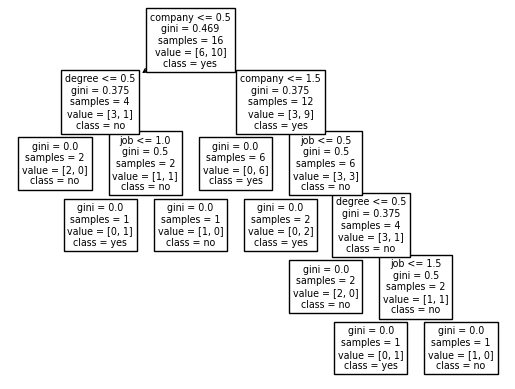

In [37]:
import matplotlib.pyplot as plt
tree.plot_tree(model,filled=False,feature_names=xtrain.columns,class_names=['no','yes'])

[Text(0.36363636363636365, 0.9166666666666666, 'company <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]\nclass = 1'),
 Text(0.18181818181818182, 0.75, 'degree <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = 0'),
 Text(0.09090909090909091, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.2727272727272727, 0.5833333333333334, 'job <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.18181818181818182, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.36363636363636365, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.5454545454545454, 0.75, 'company <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]\nclass = 1'),
 Text(0.45454545454545453, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = 1'),
 Text(0.6363636363636364, 0.5833333333333334, 'job <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = 0'),
 Text(0.5454545454545454, 0.41666

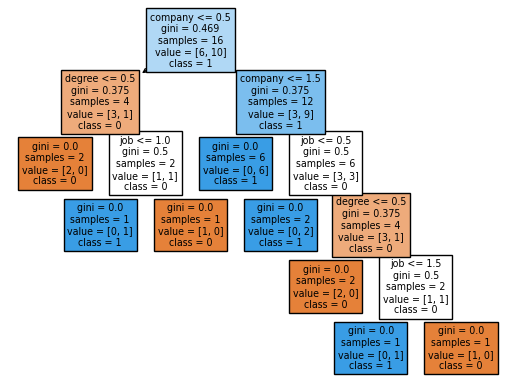

In [36]:
classes=[str(i) for i in ytrain.unique()]
tree.plot_tree(model,filled='True',feature_names=xtrain.columns,class_names=classes)